#### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ex2data.csv")
print(len(df))
df.head()

217


,Exam_1,Exam_2,Admission Status
0,76.098787,87.420570,1
1,55.482161,35.570703,0
2,82.368754,40.618255,0
3,34.212061,44.209529,0
4,16.647000,53.874000,1


#### Train and Test set

In [3]:
train_count = int(0.8*len(df))
df_train = df[0:train_count]
df_test = df[train_count:]

#### Convert Features to Numpy Array

In [4]:
x1 = df['Exam_1'].to_numpy()
x2 = df['Exam_2'].to_numpy()
y_train = df['Admission Status'].to_numpy()
x_train = np.array([x1,x2])
y_train = np.array([y_train])

#### Prediction Function

In [5]:
def predict_y(w,x_train,b):
    y_pred = np.zeros((1,m))
    z = np.dot(w,x_train) + b
    sig_z = np.divide(1, (1 + np.exp(-z)))
    
    for i in range(0,m):
        if (sig_z[0,i] >= 0.5):
            y_pred[0,i] = 1
        else:
            y_pred[0,i] = 0
                
    return y_pred

In [6]:
w = np.array([[0.0,0.3]])
b  = -10
m = len(x1)
y_pred = predict_y(w,x_train,b)
print(f"y = {y_train}") 
print("\n")
print(f"y_pred = {y_pred}") 

y = [[1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1
  0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1
  1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1
  1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1
  1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1
  1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
  0]]


y_pred = [[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
  0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 

#### Cost Function

In [7]:
def calculate_cost(y,y_pred,lamda):
     y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Clip y_pred to avoid log(0) and log(1)
     j1 = (1/m) * ( - np.dot(y, np.log(y_pred).T) - np.dot((1-y), np.log(1-y_pred).T) )
     j2 = (lamda/(2*m)) * np.sum(np.square(w))
     j = j1 + j2
     cost = j[0,0]
     return cost

In [8]:
m = len(x1)
lamda = 0.5
cost = calculate_cost(y_train,y_pred,lamda)
print(f"cost = {cost}")

cost = 16.235215023388502


#### Calculate Gradient

In [9]:
def calculate_grdaient(y_train,y_pred,lamda):
    m = len(x1)
    diff = np.subtract(y_pred,y_train)
    dj_dw = (1/m) * np.dot(diff,x_train.T) + ((lamda/m)*w)
    dj_db = (1/m) * np.sum(diff)
    return dj_dw, dj_db

In [10]:
dj_dw, dj_db = calculate_grdaient(y_train,y_pred,lamda)
print(f"dj_dw : {dj_dw}")
print(f"dj_db : {dj_db}")

dj_dw : [[13.4176556  21.16793838]]
dj_db : 0.2672811059907834


#### Optimise Weights

In [11]:
def optimise_weights(w,x_train,b,alpha,lamda,iter):
    dj_dw = np.zeros((1,2))
    dj_db = 0
    w_all = np.zeros((iter,2))
    b_all = np.zeros(iter)
    cost_all = np.zeros(iter)
    
    for i in range(0,iter):
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        y_pred = predict_y(w,x_train,b)
        j = calculate_cost(y_train, y_pred, lamda)
        dj_dw, dj_db = calculate_grdaient(y_train,y_pred,lamda)
        print(f"Iteration : {i}, w = {w}, b = {b:.4f}, Cost = {j:.4f}")
        w_all[i,] = w
        b_all[i] = b
        cost_all[i] = j
        
    return w_all,b_all,cost_all

In [13]:
w = np.array([[0.0,0.3]])
b  = -10
x_train = np.array([x1,x2])
alpha = 0.001
lamda = 0.5
iter = 150
w_all,b_all,cost_all = optimise_weights(w,x_train,b,alpha,lamda,iter)

Iteration : 0, w = [[0.  0.3]], b = -10.0000, Cost = 16.2352
Iteration : 1, w = [[-0.01341766  0.27883206]], b = -10.0003, Cost = 15.7577
Iteration : 2, w = [[-0.02450361  0.25883786]], b = -10.0005, Cost = 15.1210
Iteration : 3, w = [[-0.03016774  0.24234214]], b = -10.0007, Cost = 15.1210
Iteration : 4, w = [[-0.03280688  0.22875714]], b = -10.0007, Cost = 14.1660
Iteration : 5, w = [[-0.0324975   0.21792367]], b = -10.0008, Cost = 14.3251
Iteration : 6, w = [[-0.02969832  0.2092964 ]], b = -10.0008, Cost = 14.6434
Iteration : 7, w = [[-0.02622692  0.20119716]], b = -10.0007, Cost = 14.9618
Iteration : 8, w = [[-0.02259146  0.19357626]], b = -10.0007, Cost = 14.8026
Iteration : 9, w = [[-0.01874825  0.18621489]], b = -10.0007, Cost = 15.2801
Iteration : 10, w = [[-0.01402931  0.18016424]], b = -10.0006, Cost = 15.2801
Iteration : 11, w = [[-0.00860354  0.17518387]], b = -10.0006, Cost = 15.5984
Iteration : 12, w = [[-0.00296595  0.17073709]], b = -10.0005, Cost = 15.1209
Iteration : 

In [14]:
min_value = np.min(cost_all) # Finding the minimum value
min_index = np.argmin(cost_all) # Finding the position (index) of the minimum value
cost = cost_all[min_index]
w = w_all[min_index]
b = b_all[min_index]
print(f"Optimize value of w = {w}, b = {b}, with Cost = {cost} at iteration : {min_index}")

Optimize value of w = [0.07292874 0.09810517], b = -9.997410138248844, with Cost = 13.210894604161576 at iteration : 43


#### Loss Function

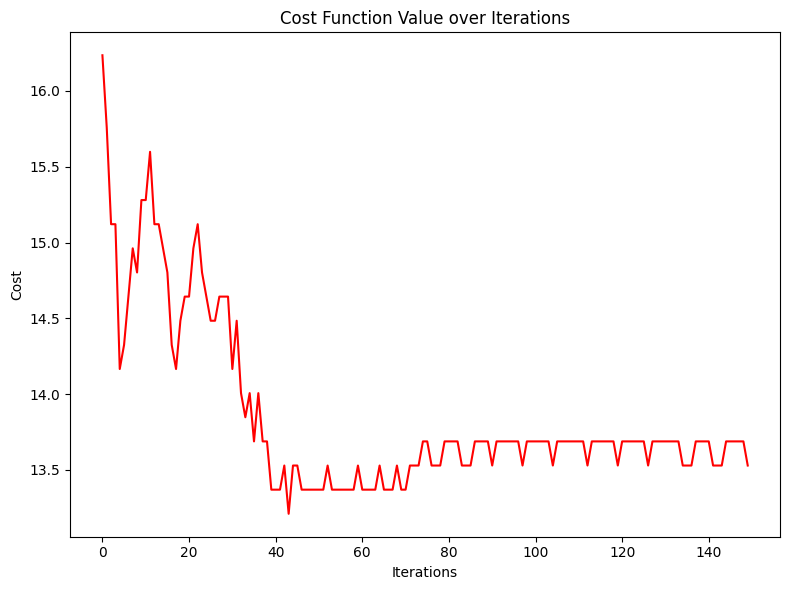

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the weight values over iterations
plt.figure(figsize=(8, 6))

# Plot for cost_all
plt.plot(cost_all, color='red')
#plt.plot(cost_all, color='red')
plt.title('Cost Function Value over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

#### Calculate Metric for Train Data

In [16]:
print(f"y : {y_train}")
print(f"y_pred : {y_pred}")

y : [[1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1
  0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1
  1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1
  1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1
  1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1
  1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
  0]]
y_pred : [[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
  0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.

In [17]:
def Calculate_Metric(y_pred,y_train):
    TP = TN = FP = FN = 0
    
    for i in range(0,m):
        if y_pred[0,i] == y_train[0,i] == 1:
            TP = TP + 1
        if y_pred[0,i] == y_train[0,i] == 0:
            TN = TN + 1
        if y_pred[0,i] == 1 and y_train[0,i] == 0:
            FP = FP + 1
        if y_pred[0,i] == 0 and y_train[0,i] == 1:
            FN = FN + 1

    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    Recall = TP / (TP + FN)
    Precission = TP / (TP + FP)
    F1_Score = 2 * (Precission*Recall)/(Precission+Recall)
    
    return TP,TN,FP,FN,Accuracy,Recall,Precission,F1_Score


TP,TN,FP,FN,Accuracy,Recall,Precission,F1_Score = Calculate_Metric(y_pred,y_train)
print(f"True Positive : {TP}")
print(f"True Negative : {TN}")
print(f"False Positive : {FP}")
print(f"False Negative : {FN}")
print(f"Accuracy : {Accuracy}")
print(f"Recall : {Recall}")
print(f"Precission : {Precission}")
print(f"F1 Score : {F1_Score}")

True Positive : 96
True Negative : 19
False Positive : 80
False Negative : 22
Accuracy : 0.5299539170506913
Recall : 0.8135593220338984
Precission : 0.5454545454545454
F1 Score : 0.653061224489796


#### Calculate Metric for Test Data 

In [18]:
x1 = df_test['Exam_1'].to_numpy()
x2 = df_test['Exam_2'].to_numpy()
y_test = df_test['Admission Status'].to_numpy()
x_test = np.array([x1,x2])
m = len(x1)
y_test = np.array([y_test])

In [19]:
def predict_y(w,x_test,b):
    y_pred = np.zeros((1,m))
    w =np.array([w])
    z = np.dot(w,x_test) + b
    sig_z = np.divide(1, (1 + np.exp(-z)))
    
    for i in range(0,m):
        if (sig_z[0,i] >= 0.5):
            y_pred[0,i] = 1
        else:
            y_pred[0,i] = 0
                
    return y_pred

In [20]:
y_pred = predict_y(w,x_test,b)
y_pred

array([[1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.]])

In [21]:
def Calculate_Metric(y_pred,y_test):
    TP = TN = FP = FN = 0
    
    for i in range(0,m):
        if y_pred[0,i] == y_test[0,i] == 1:
            TP = TP + 1
        if y_pred[0,i] == y_test[0,i] == 0:
            TN = TN + 1
        if y_pred[0,i] == 1 and y_test[0,i] == 0:
            FP = FP + 1
        if y_pred[0,i] == 0 and y_test[0,i] == 1:
            FN = FN + 1

    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    Recall = TP / (TP + FN)
    Precission = TP / (TP + FP)
    F1_Score = 2 * (Precission*Recall)/(Precission+Recall)
    
    return TP,TN,FP,FN,Accuracy,Recall,Precission,F1_Score


TP,TN,FP,FN,Accuracy,Recall,Precission,F1_Score = Calculate_Metric(y_pred,y_train)
print(f"True Positive : {TP}")
print(f"True Negative : {TN}")
print(f"False Positive : {FP}")
print(f"False Negative : {FN}")
print(f"Accuracy : {Accuracy}")
print(f"Recall : {Recall}")
print(f"Precission : {Precission}")
print(f"F1 Score : {F1_Score}")

True Positive : 10
True Negative : 14
False Positive : 8
False Negative : 12
Accuracy : 0.5454545454545454
Recall : 0.45454545454545453
Precission : 0.5555555555555556
F1 Score : 0.5
